## Visualization Cookbook: simple recipies for plotting, interactive widgets and animation

In [2]:
#Load the basics
import numpy as np    
import scipy as sci
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline

In [3]:
print(plt.style.available) 
plt.style.use('bmh') # Choose a style 

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep', 'paper', 'small-markers', 'size22', 'size2ver', 'larger-labels', 'paper2', 'ltx-siunitx', 'larger-fonts']


In [4]:
# Increase resolution for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### Plotting in 1D

## A gallery of useful examples

**For a greater variety of plotting examples check out [Matploltib Gallery!](https://matplotlib.org/3.1.1/gallery/index.html)**

1D plotting is conveniently done by creating fig and ax objects which allow coutom styling plots and figure properties separately. 

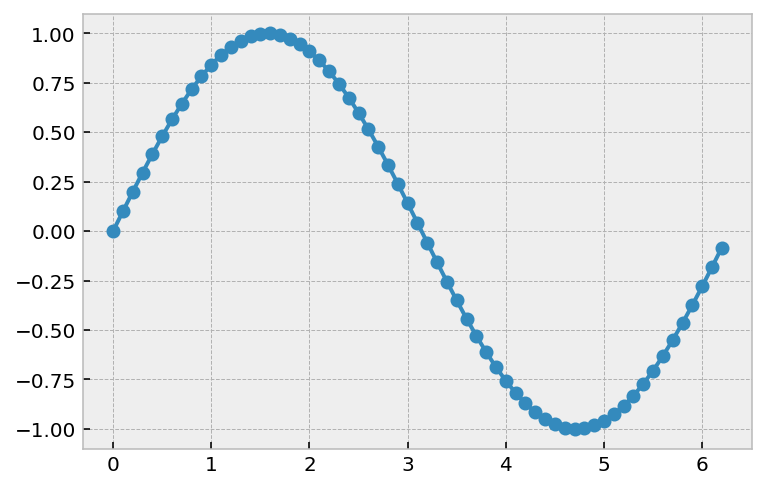

In [6]:
fig, ax = plt.subplots()          # Create fig and ax objects

t = np.arange(0.0,  2*np.pi, 0.1) # create x values via np.arange or np.linspace

s = np.sin(t)                     # create y values

ax.plot(t, s, '-o')                     # make the plot

#fig.savefig('myFIG.png')         # save figure

#### fig and ax objects
For customizing plots it is more convenient to define **fig** and **ax** objects.  One can then use ax object to make veriety of subplots then use fig to save the entire figure as one pdf. Try changing fig size, number of columns and rows.

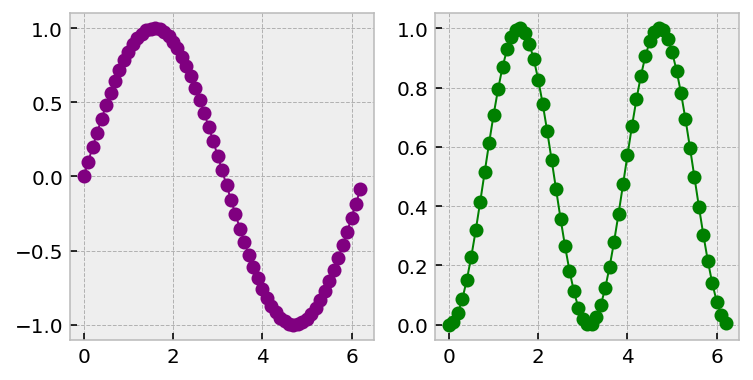

In [8]:
t = np.arange(0.0,  2*np.pi, 0.1) # create x values
s = np.sin(t)                     # create y values

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(6,3))          

ax[0].plot(t, s,'-o', color='purple', lw=1.0)  # plot on subplot-1
ax[1].plot(t, s**2,'-o', color='green',  lw=1.0)  # plot  on subplot-2

#fig.savefig('sd.png')             # save the figure

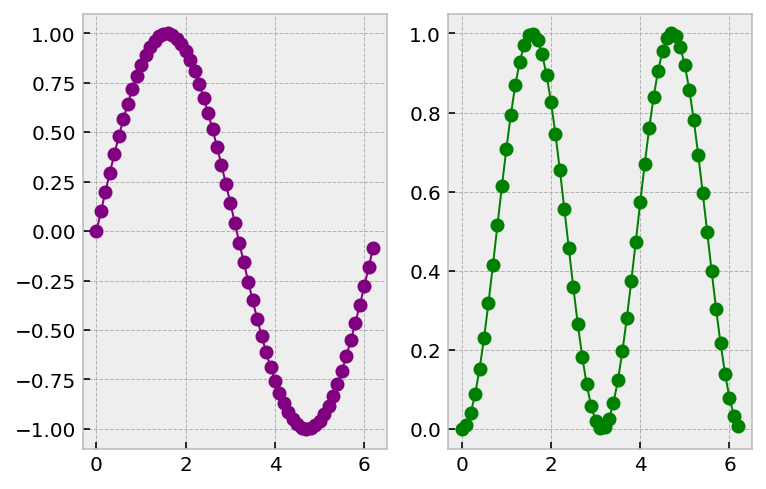

In [9]:
t = np.arange(0.0,  2*np.pi, 0.1) 
s = np.sin(t) 


fig = plt.figure() # creates a figure object

ax = fig.add_subplot(1,2,1)                      
ax.plot(t, s, '-o',color='purple', lw=1.0)                    

ax = fig.add_subplot(1,2,2)
ax.plot(t, s**2, '-o',color='green',  lw=1.0)

### Plotting in 2D

To make 2D plots we need to generate 2D grid $(x,y)$ of points and pass it to our function $f(x,y)$

$$f(x,y) = sin(x) \cdot cos(x) \,\,\,$$

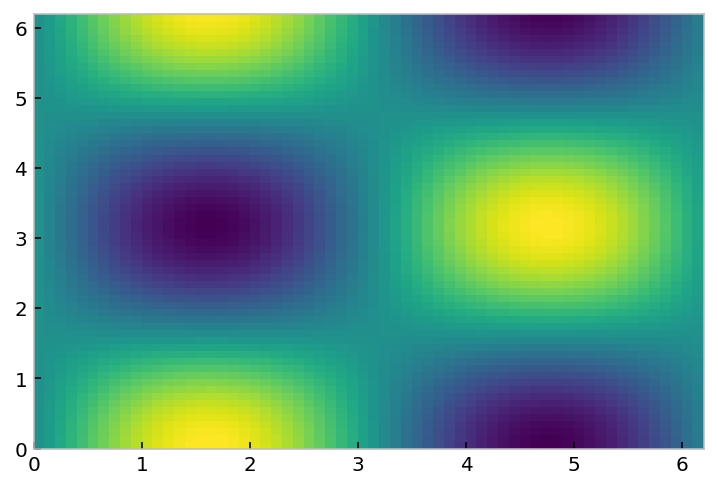

In [14]:
x = np.arange(0.0,  2*np.pi, 0.1)   # create x values
y = np.arange(0.0,  2*np.pi, 0.1)   # create y values

X, Y = np.meshgrid(x,y)             # tunring 1D array into 2D grids of x and y values

Z = np.sin(X) * np.cos(Y)           # feed 2D grids to our 2D function f(x,y)

fig, ax = plt.subplots()            # Create fig and ax objects
ax.pcolor(X, Y, Z)                  # plot 

# try also ax.contour, ax.contourf

### Plot 3D

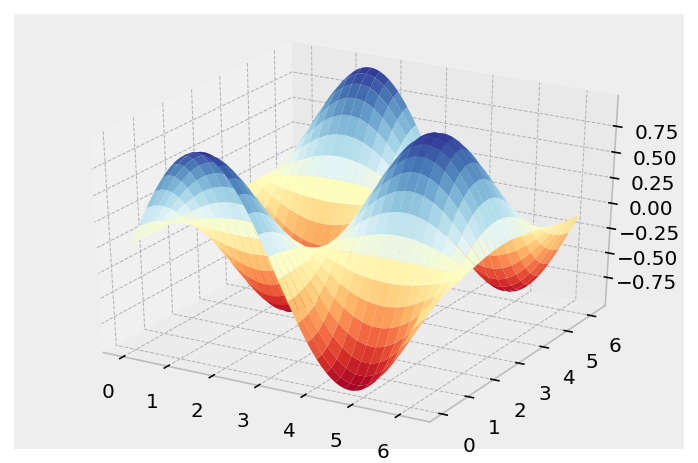

In [15]:
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

# Create fig and ax objects for 3d plotting
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  

# Using X,Y,Z grid of points in previous step 
ax.plot_surface(X, Y, Z, cmap='RdYlBu')

### Plotting histograms with matplotlib

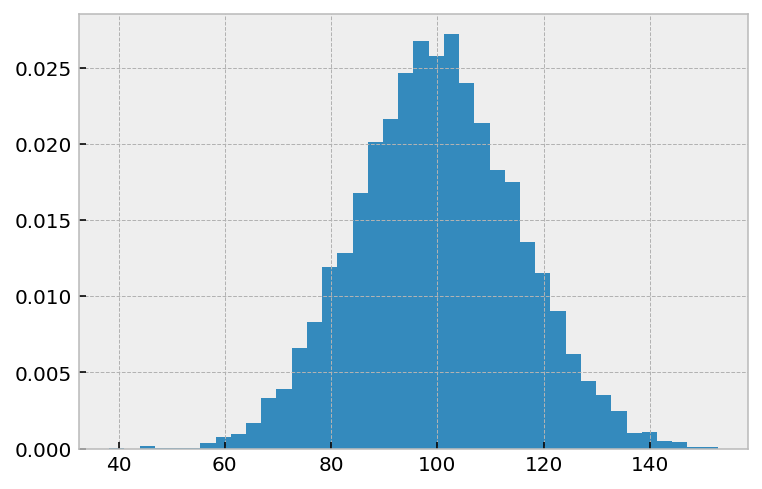

In [18]:
fig, ax = plt.subplots()

# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# Plot 1D histogram of the data
hist = ax.hist(x, bins=40, density=True)

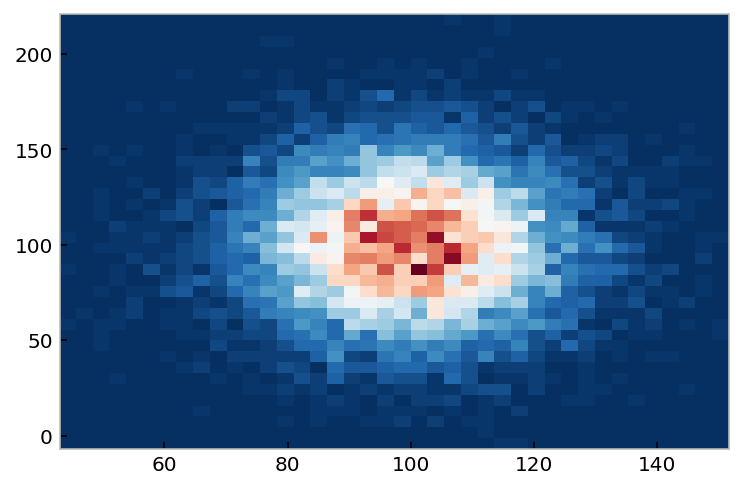

In [19]:
fig, ax = plt.subplots()

# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
y = mu + 2*sigma * np.random.randn(10000)

# Plot 2D histogram of the data
hist = ax.hist2d(x, y, bins=40, density=True, cmap='RdBu_r')

### Plotting histograms with seaborn

For visualizing statistical plots there is a specialized library build on top of matplotlib that simplifies many intermediate steps that are needed to go from data to beautiful and polished visualization. 

- [Seaborn](https://seaborn.pydata.org/index.html)

In [20]:
import seaborn as sns
from scipy import stats

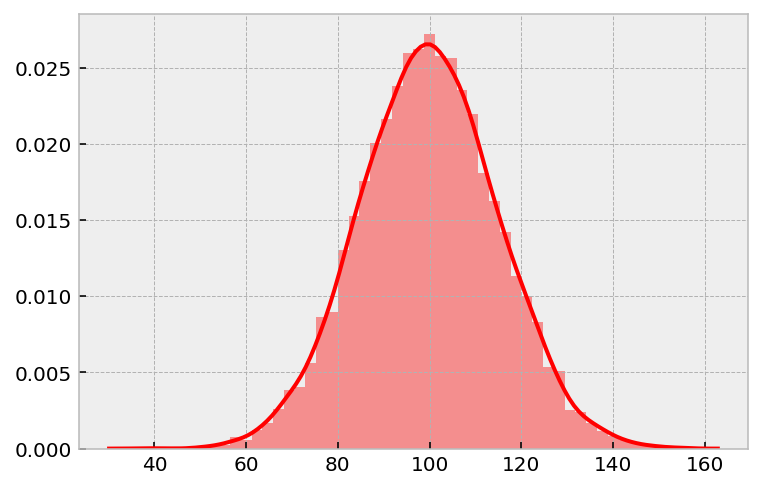

In [21]:
# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

sns.distplot(x,kde=True, color='red')

#sns.distplot(x,kde=False, fit=stats.norm) # trya gamma, beta, etc

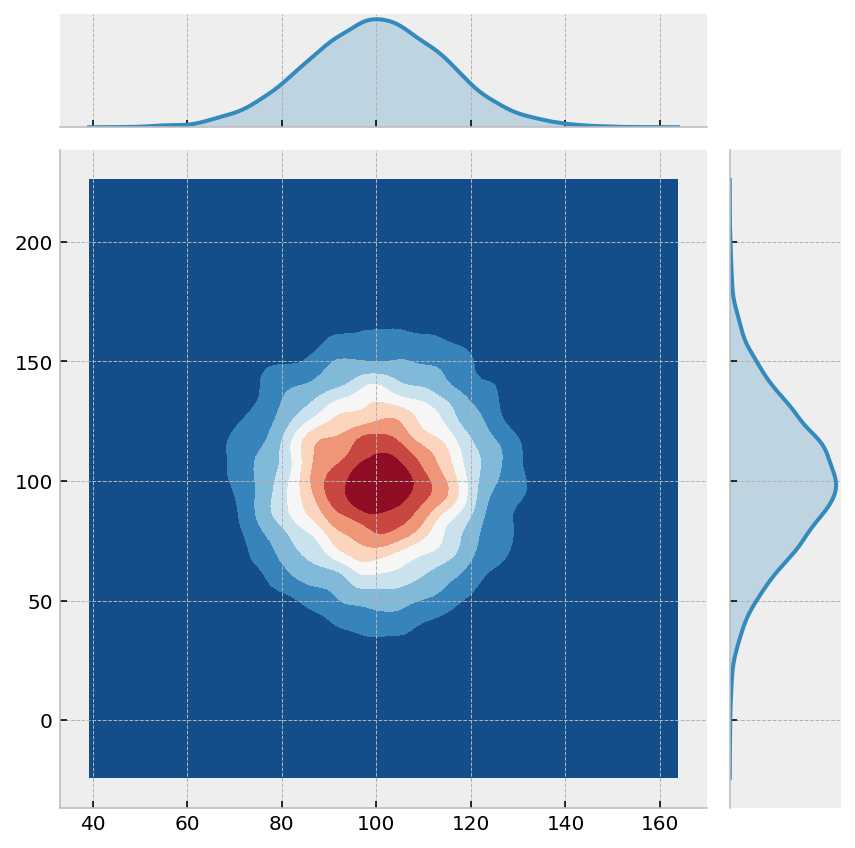

In [22]:
# Make up some random data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
y = mu + 2*sigma * np.random.randn(10000)

sns.jointplot(x , y, kind="kde", cmap='RdBu_r')

### Using interactive widgets for data exploration

Suppose we would like to explore how the variation of parameter $\lambda$ affects the following function of a standing wave:

$$
f(x) = sin \Big(\frac{2\pi x}{\lambda}\Big)
$$

**Step 1** Make a python-function which creates a plot as a function of a parameter(s) of interest.

**Step 2** Add an interactive widget on top to vary the parameter.

In [25]:
@widgets.interact(L=(1,12))    # Vary between 0.2 and 20

def wave(L=1):          # We make default value equal to 1
    
    x=np.linspace(-10,10,1000)
        
    f = np.sin(2*np.pi*x/L)
        
    plt.plot(x,f, lw=2, color='blue')

interactive(children=(IntSlider(value=1, description='L', max=12, min=1), Output()), _dom_classes=('widget-int…

### Simple animations

While widgets are useful sometimes we want to make movies of our numerical explorations. We can do taht by using animate methods from matploltib library. To show animation we also need to change %matplotlib magic to notebook format as done in the cell below.

In [39]:
import matplotlib.animation as animation

#We change the matplotlib format from inline to notebook
#Make sure to go back to %matplotlib inline afterwords for making non-animated plots
%matplotlib notebook  
%matplotlib notebook  

Here we make a simple animation of a traveling wave. Animation is made by re-drawing the plot for different values of t with a pre-defined consant interval.

In [77]:
def travel_wave(x,t):       
    '''A function to be animated over time t'''    
    
    return np.cos(x-t) * np.sin(x/10-t/10) 

def update_line(t):  
    '''Animation function'''
    
    line.set_ydata(travel_wave(x,t))  # update the plot as the t variables evolves
    
    return line,

<IPython.core.display.Javascript object>


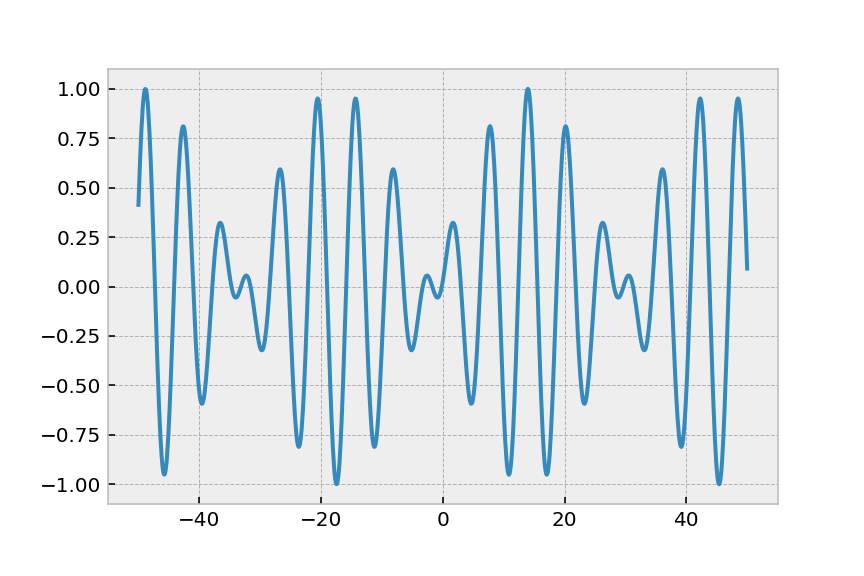

In [78]:
fig, ax = plt.subplots()

x     = np.linspace(-50,50,1000)  # We will keep x-values fixed
line,   = ax.plot(x, travel_wave(x,0))  #the plot will be updated by varying the t-values

animate = animation.FuncAnimation(fig, update_line, interval=40, blit=True, save_count=200)

# Save animation
#ani.save("Mymovie.mp4")

### Additional resoruces. 

Matplotlib has a huge scientific user base. This means that you can always find a good working template of any kind of visualization which you want to make. With basic understanding of matplotlib and some solid googling skills you can go very far. Here are some additional resources that you may find helpful

- [Matplotlib](https://matplotlib.org/index.html)

- [Matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html)

- [Matplotlib Blog](https://matplotlib.org/matplotblog/)

- [PyViz universe](https://pyviz.org/index.html)

- [The Python Graph Gallery](https://python-graph-gallery.com/)